# Notes July 26th 2017

More Pandas, woo!

![not these pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Ailuropoda_melanoleuca_Schoenbrunn_07-2008.jpg/320px-Ailuropoda_melanoleuca_Schoenbrunn_07-2008.jpg)

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows', 25)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

## Series

In [7]:
s = pd.Series([1, 1, 2, 3, 5, 8, 13, 21])

In [9]:
s

0     1
1     1
2     2
3     3
4     5
5     8
6    13
7    21
dtype: int64

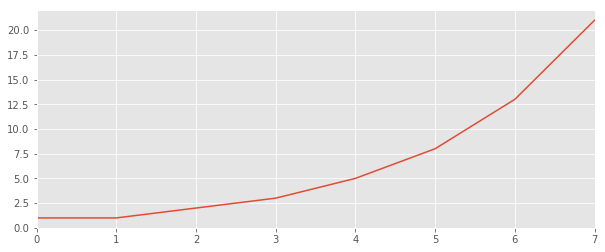

In [11]:
s.plot()

In [13]:
t = pd.Series([1, 1, 2, 3, 5, 8, 13, 21],
              ["a", "b", "c", "d", "e", "f", "g", "h"])

In [15]:
t

a     1
b     1
c     2
d     3
e     5
f     8
g    13
h    21
dtype: int64

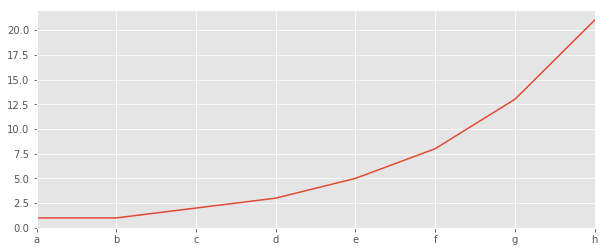

In [17]:
t.plot()

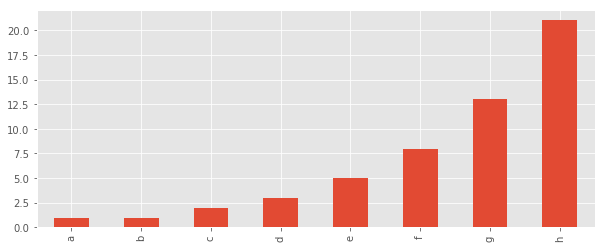

In [18]:
t.plot(kind="bar")

In [20]:
t.describe()

count     8.000000
mean      6.750000
std       7.066015
min       1.000000
25%       1.750000
50%       4.000000
75%       9.250000
max      21.000000
dtype: float64

In [22]:
t.mean()

6.75

In [24]:
t.median()

4.0

In [27]:
t[5] # indexing by position/offset/location

8

In [30]:
t["g"] # indexing by label

13

In [32]:
t[ ["b", "c", "d"] ]

b    1
c    2
d    3
dtype: int64

In [33]:
t[ [True, False, True, False, False, True, False, True] ]

a     1
c     2
f     8
h    21
dtype: int64

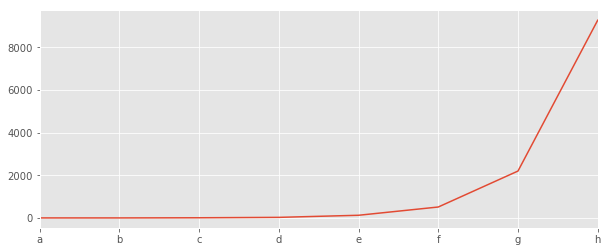

In [39]:
(t * t * t).plot()

In [44]:
t == 8 # with operators of inequality, you get a new series (of booleans)

a    False
b    False
c    False
d    False
e    False
f     True
g    False
h    False
dtype: bool

In [46]:
t[t > 10]

g    13
h    21
dtype: int64

## DataFrames

here's an example dataframe:

In [48]:
river_data = {
    "Name": ["Amazon", "Nile", "Yangtze", "Mississippi"],
    "Length": [6992, 6835, 6300, 6275],
    "Drainage area": [7050000, 3254555, 1800000, 2980000],
    "Discharge": [209000, 2800, 31900, 16200]
}
river_df = pd.DataFrame(river_data,
    columns=["Name", "Length", "Drainage area", "Discharge"])

In [50]:
type(river_df)

pandas.core.frame.DataFrame

In [52]:
river_df

,Name,Length,Drainage area,Discharge
0,Amazon,6992,7050000,209000
1,Nile,6835,3254555,2800
2,Yangtze,6300,1800000,31900
3,Mississippi,6275,2980000,16200


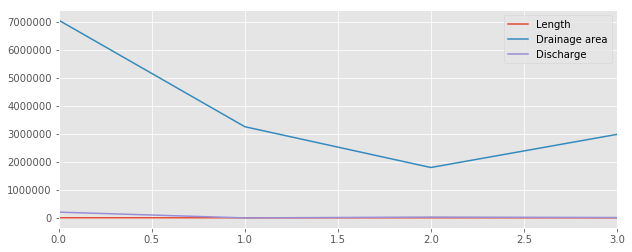

In [54]:
river_df.plot()

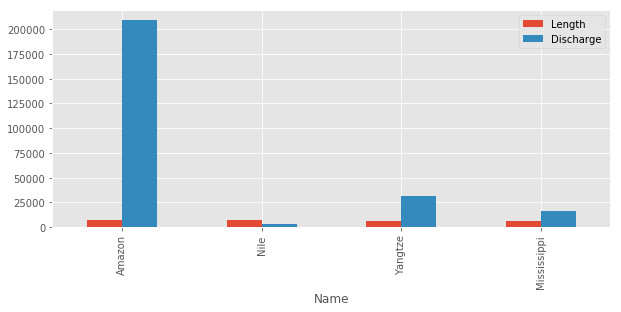

In [58]:
river_df.plot(kind="bar", x="Name", y=["Length", "Discharge"])

## DataFrame indexing

### DataFrame → Series

Getting a column as a series

In [60]:
river_df["Length"]

0    6992
1    6835
2    6300
3    6275
Name: Length, dtype: int64

In [62]:
type(river_df["Length"])

pandas.core.series.Series

In [65]:
river_df["Length"].median()

6567.5

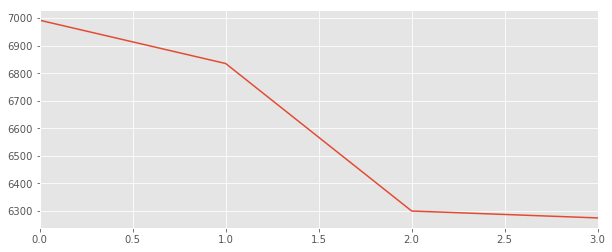

In [67]:
river_df["Length"].plot()

Getting a row from a DataFrame

In [69]:
river_df.iloc[2]

Name             Yangtze
Length              6300
Drainage area    1800000
Discharge          31900
Name: 2, dtype: object

In [70]:
river_df["Length"][2]

6300

In [71]:
river_df.iloc[2]["Length"]

6300

### Making new Dataframes from existing Dataframes

filter dataframes, transform dataframes

In [73]:
river_df[ ["Name", "Length"] ]

,Name,Length
0,Amazon,6992
1,Nile,6835
2,Yangtze,6300
3,Mississippi,6275


In [76]:
river_df.iloc[1:3]

,Name,Length,Drainage area,Discharge
1,Nile,6835,3254555,2800
2,Yangtze,6300,1800000,31900


In [77]:
river_df["Name"]

0         Amazon
1           Nile
2        Yangtze
3    Mississippi
Name: Name, dtype: object

In [79]:
river_df[["Name"]]

,Name
0,Amazon
1,Nile
2,Yangtze
3,Mississippi


In [81]:
river_df["Discharge"] * 2

0    418000
1      5600
2     63800
3     32400
Name: Discharge, dtype: int64

In [83]:
river_df["Discharge"] > 30000

0     True
1    False
2     True
3    False
Name: Discharge, dtype: bool

In [84]:
river_df[ [True, False, True, False] ]

,Name,Length,Drainage area,Discharge
0,Amazon,6992,7050000,209000
2,Yangtze,6300,1800000,31900


In [87]:
river_df[ river_df["Discharge"] > 30000 ]

,Name,Length,Drainage area,Discharge
0,Amazon,6992,7050000,209000
2,Yangtze,6300,1800000,31900


In [89]:
matching_rows = river_df["Discharge"] > 30000

In [91]:
matching_rows

0     True
1    False
2     True
3    False
Name: Discharge, dtype: bool

In [93]:
river_df[matching_rows]

,Name,Length,Drainage area,Discharge
0,Amazon,6992,7050000,209000
2,Yangtze,6300,1800000,31900


## Working with real data!!!!! wow 😻

In [94]:
df = pd.read_csv("./PRSA_data_2010.1.1-2014.12.31.csv")

In [96]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


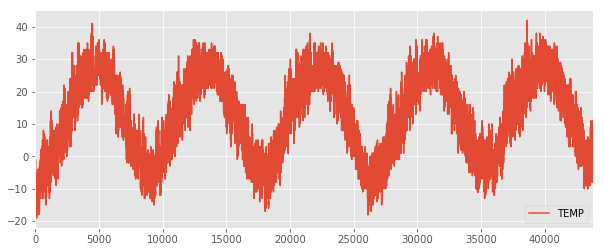

In [99]:
df.plot(y="TEMP")

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [102]:
df["pm2.5"].describe()

count    41757.000000
mean        98.613215
std         92.050387
min          0.000000
25%         29.000000
50%         72.000000
75%        137.000000
max        994.000000
Name: pm2.5, dtype: float64

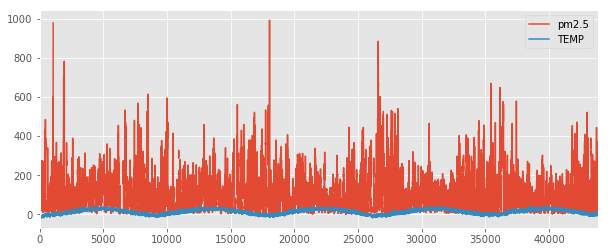

In [105]:
df.plot(y=["pm2.5", "TEMP"])

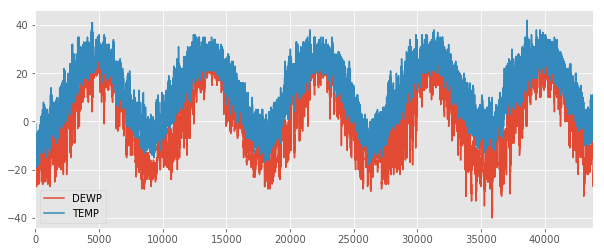

In [107]:
df.plot(y=["DEWP", "TEMP"])

In [109]:
df["TEMP"].mean()

12.448521358159981

In [114]:
# average temperature in january
df[df["month"] == 1]["TEMP"].mean()

-4.553225806451613

In [116]:
# average temperature in january
df[df["month"] == 7]["TEMP"].mean()

27.19731182795699

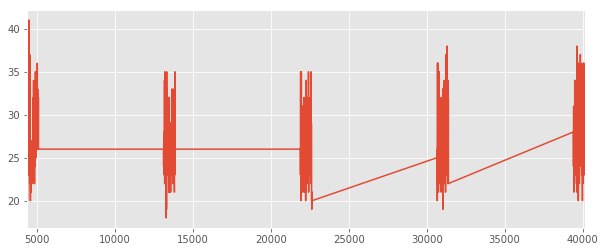

In [118]:
df[df["month"] == 7]["TEMP"].plot() # weird, don't do this

### Histograms and scatter plots

Histogram!

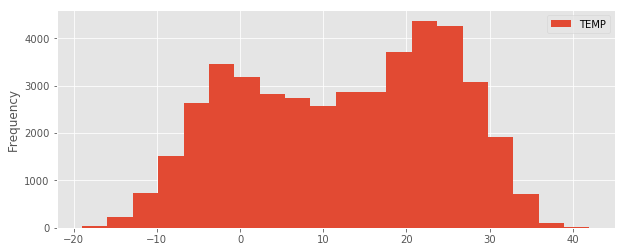

In [124]:
df.plot(y="TEMP", kind="hist", bins=20)

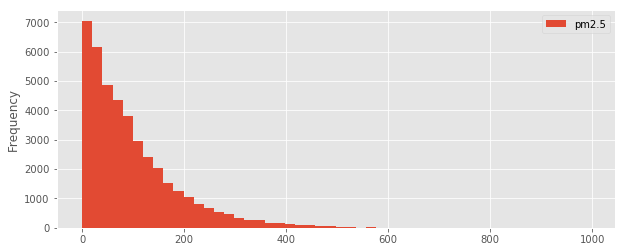

In [127]:
df.plot(y="pm2.5", kind="hist", bins=50)

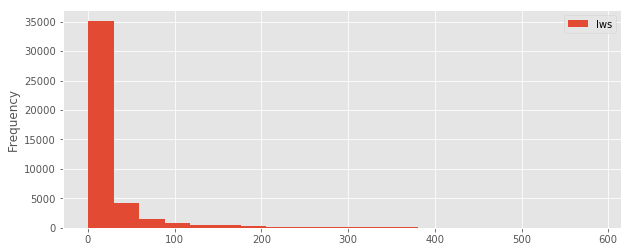

In [129]:
df.plot(y="Iws", kind="hist", bins=20)

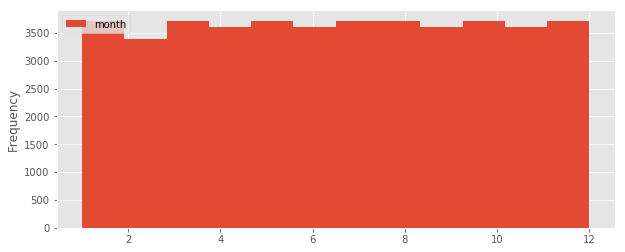

In [137]:
df.plot(y="month", kind="hist", bins=12)

### Scatter plots

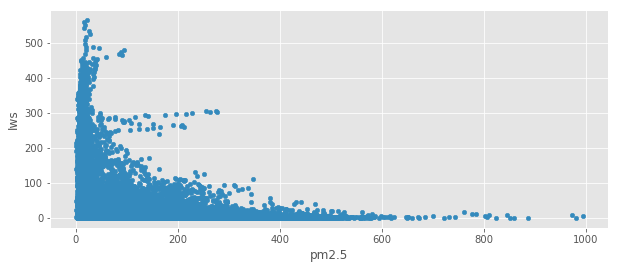

In [139]:
df.plot(kind="scatter", x="pm2.5", y="Iws")

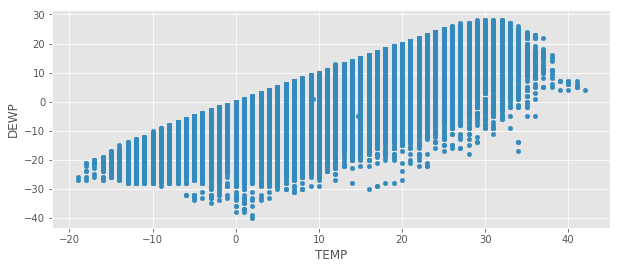

In [140]:
df.plot(kind="scatter", x="TEMP", y="DEWP")

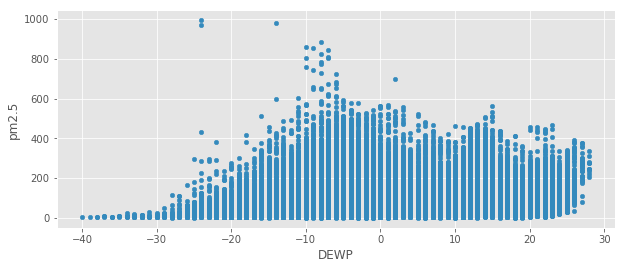

In [142]:
df.plot(kind="scatter", x="DEWP", y="pm2.5")

In [144]:
np.random.uniform(0, 100, size=50)

array([ 21.15802419,  61.88235548,  85.81256991,  88.30524899,
        16.54579917,  71.28540517,  10.26092091,  62.67964954,
        41.85332904,  17.50378892,  11.74533662,  25.14607363,
        25.07874039,  51.01212906,  83.28774415,  90.15233385,
        35.21782464,  80.0578259 ,  88.63789725,  41.69439122,
        31.89489702,  93.96674297,  48.13346901,   9.59045846,
        95.43903017,  39.08725449,  29.59401666,  53.6614367 ,
        77.66465104,  39.04410853,  57.73552421,  26.82370041,
        91.06096278,  29.67596319,  43.44001867,   8.27385715,
        67.2708809 ,   3.59520549,  36.97763572,  11.76257984,
        41.23030824,   1.62748683,  44.24439276,  54.74416588,
        22.19435226,  93.8636289 ,  47.83396136,  25.99516485,
        48.6851523 ,  31.45829969])

In [156]:
random_df = pd.DataFrame({"A": np.random.uniform(0, 100, size=10000),
                          "B": np.random.uniform(0, 100, size=10000)})

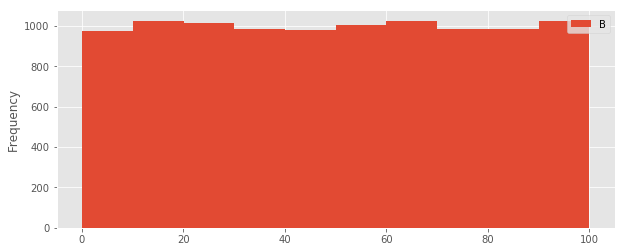

In [157]:
random_df.plot(kind="hist", y="B")

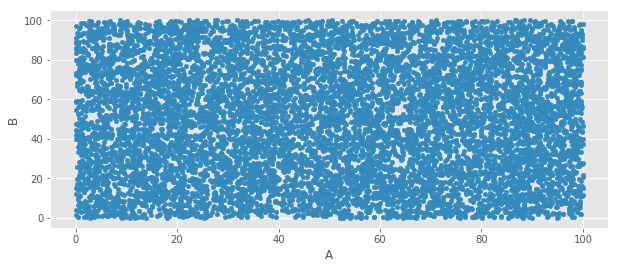

In [159]:
# if data is not correlated, it might look like this:
random_df.plot(kind="scatter", x="A", y="B")

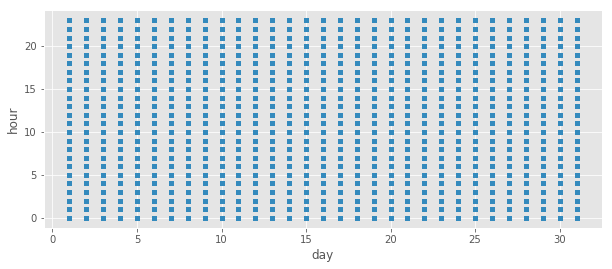

In [164]:
# useless!
df.plot(kind="scatter", x="day", y="hour")

### Answering questions with selection

In [166]:
df["pm2.5"] > 400

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
         ...  
43812    False
43813    False
43814    False
43815    False
43816    False
43817    False
43818    False
43819    False
43820    False
43821    False
43822    False
43823    False
Name: pm2.5, Length: 43824, dtype: bool

In [168]:
high_df = df[df["pm2.5"] > 400]

In [170]:
low_df = df[df["pm2.5"] <= 400]

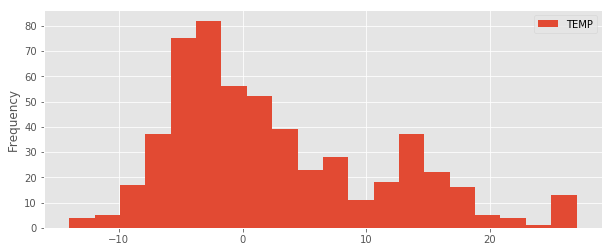

In [172]:
high_df.plot(kind="hist", y="TEMP", bins=20)

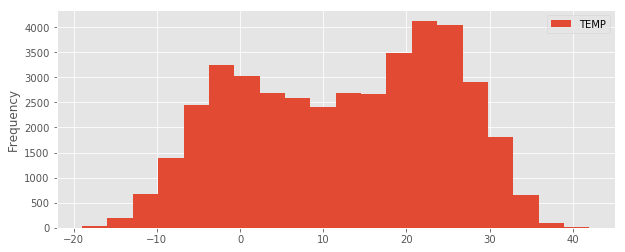

In [174]:
low_df.plot(kind="hist", y="TEMP", bins=20)

In [175]:
jan_df = df[df["month"]==1]
jul_df = df[ df["month"] == 7 ]

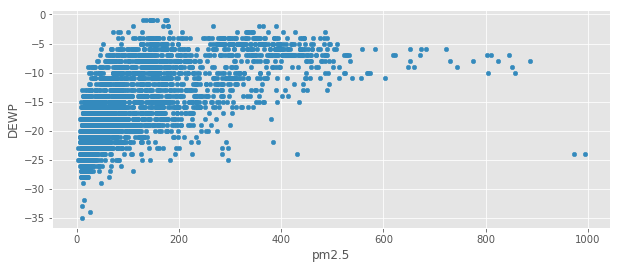

In [176]:
jan_df.plot(kind="scatter", y="DEWP", x="pm2.5")

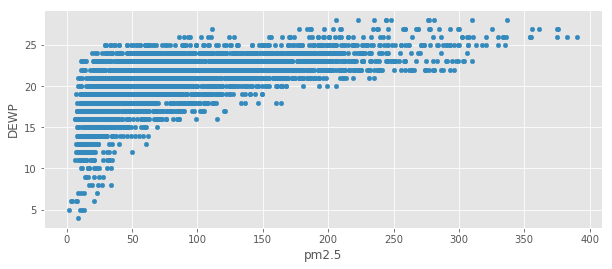

In [178]:
jul_df.plot(kind="scatter", y="DEWP", x="pm2.5")

In [181]:
df_2010 = df[df["year"]==2010]
df_2011 = df[df["year"]==2011]
df_2012 = df[df["year"]==2012]
df_2013 = df[df["year"]==2013]

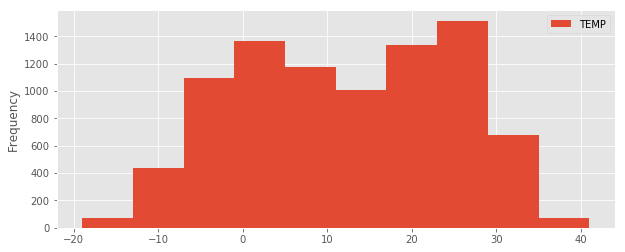

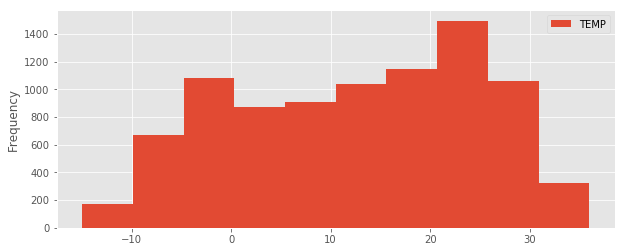

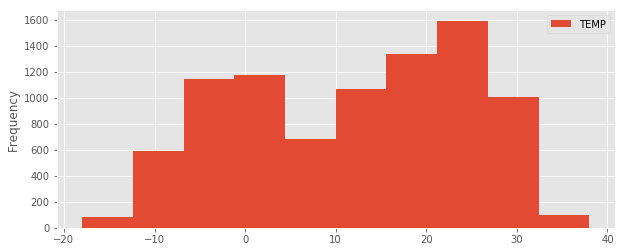

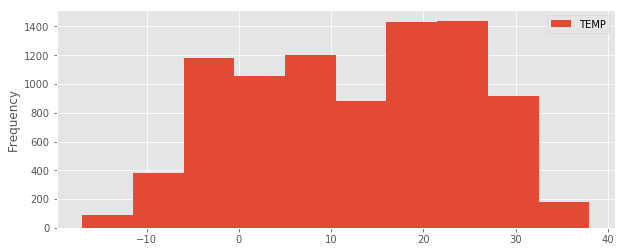

In [182]:
df_2010.plot(kind="hist", y="TEMP")
df_2011.plot(kind="hist", y="TEMP")
df_2012.plot(kind="hist", y="TEMP")
df_2013.plot(kind="hist", y="TEMP")

### Value counts and bar charts

In [184]:
df["cbwd"].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [186]:
df["cbwd"].value_counts()

SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

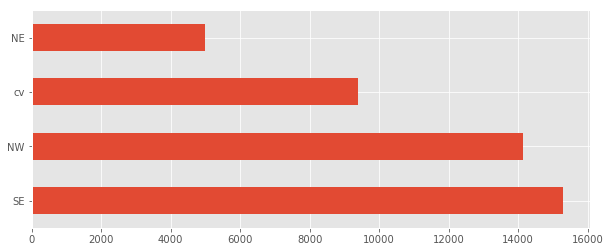

In [187]:
df["cbwd"].value_counts().plot(kind="barh")

### Exporting a CSV

In [188]:
filtered_df = df[ ["year", "month", "day", "hour", "pm2.5"] ]

In [190]:
year_df = filtered_df[filtered_df["year"]==2014]

In [193]:
year_df.to_csv("pm25_2014.csv", index=False)